In [140]:
# attempt to use scikit-learn's PCA algorithm to plot the 7 dimensional data points from output of tone analyzer
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

input_file = 'relationshipproblems100'

In [155]:
def pca_sentiments(input_file, output_file):
    # import data from data/raw/sentiments
    data = {'username': [], 'tones': []}
    with open(input_file, 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            data['username'].append(row['username'])
            tones = [float(row[x]) for x in ['Anger', 'Fear', 'Joy', 'Sadness', 'Analytical', 'Confident', 'Tentative']]
            data['tones'].append(tones)

    x = data['tones']
    y = data['username']
    pca = decomposition.PCA(n_components=2)
    df = pd.concat([pd.DataFrame(pca.fit_transform(x), columns=['component 1', 'component 2']), pd.DataFrame({'username': y})], axis=1)
    print(pca.explained_variance_ratio_)

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1)
    for name in set(y):
        color = np.random.rand(3)
        plt_x = df['component 1'][df['username'] == name]
        plt_y = df['component 2'][df['username'] == name]
        ax.scatter(plt_x, plt_y, c=color, label=name)
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('PCA of 7-dimensional Tone Analysis Data')

    # plot exported to processed/figures/
    plt.savefig(output_filepath)
    plt.show()
    plt.close()

[0.30896156 0.24810549]


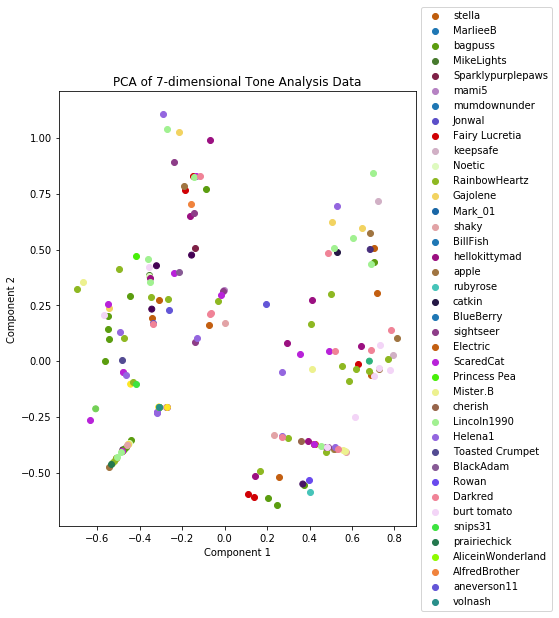

[0.28826834 0.25585746]


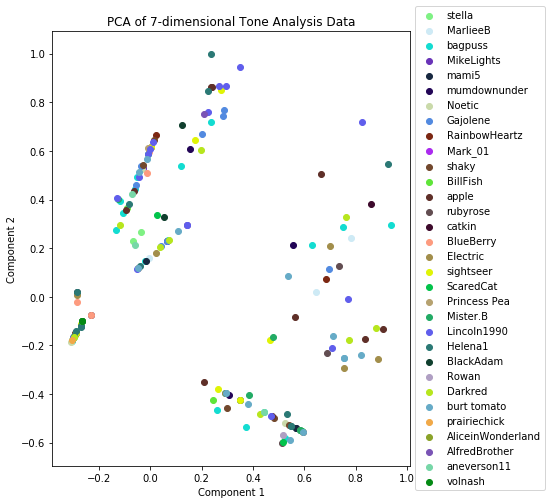

[0.3010649  0.24832316]


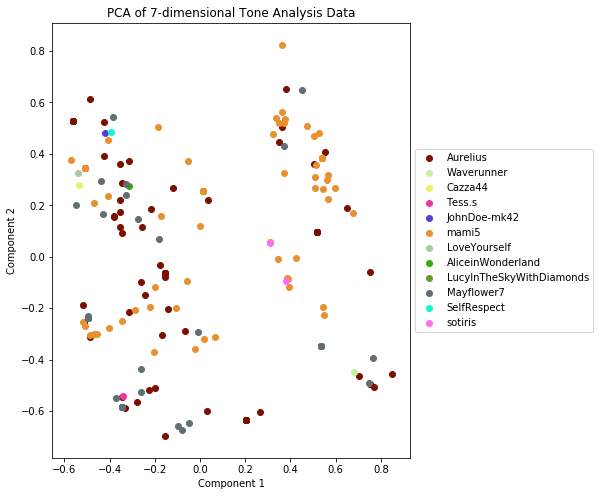

[0.27964758 0.25019314]


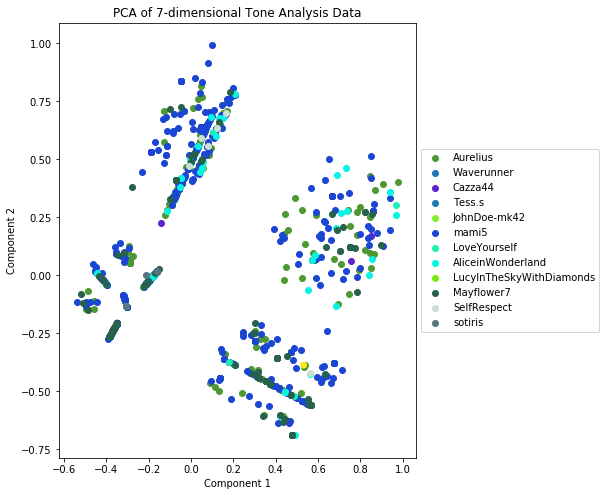

[0.36841997 0.25472399]


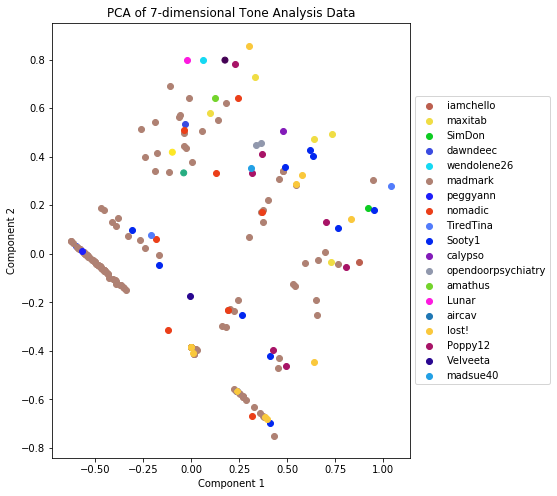

[0.2841752  0.26296608]


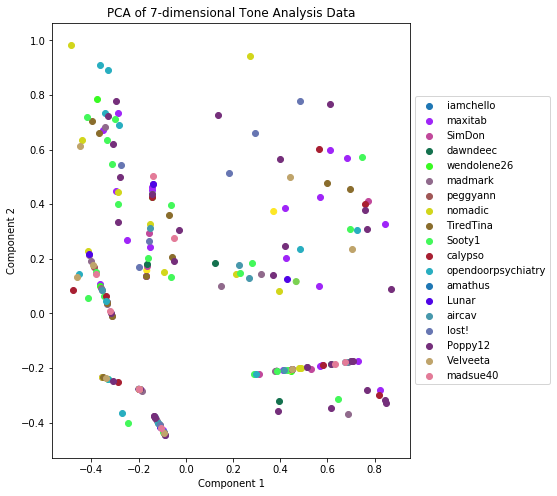

[0.32719945 0.18956531]


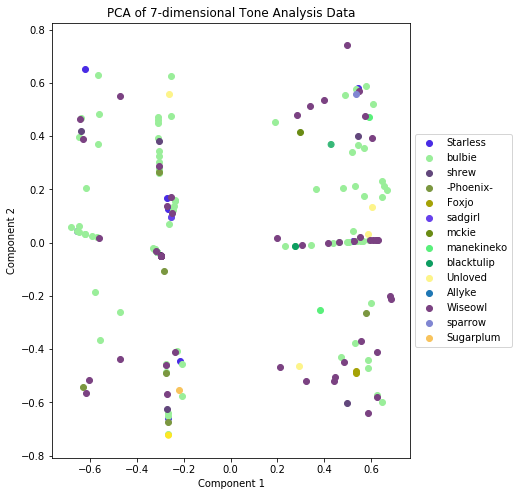

[0.29712655 0.19806173]


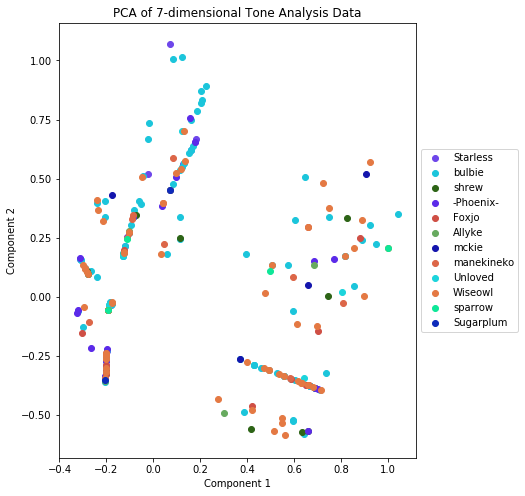

In [158]:
input_files = ['singlesentence', 'mamistruggling', 'battlingdepressionnomeds', 'lonely']
n = 200
for filename in input_files:
    for modifier in ['_doclevelsentiments', '_sentencelevelsentiments']:
        input_filename = '../../data/raw/sentiments/' + filename + str(n) + modifier + '.csv'
        output_filepath = '../../data/processed/figures/' + filename + str(n) + modifier + '_pca.png'
        pca_sentiments(input_filename, output_filename)